## Import

In [12]:
import pandas as pd
import string
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Cleaning

### Define a function to clean the datasets

In [13]:
def data_cleaning(dataframe):
    # drop rows with na
    dataframe.dropna(inplace=True)
    # drop duplicates
    dataframe.drop_duplicates(subset='id', keep='last', inplace=True)
    # Combine fields
    dataframe['combined_field'] = dataframe['title'] + ' ' + dataframe['text']
    return pd.DataFrame(dataframe)

##### Load in the schizophrenia file

In [14]:
schizophrenia_data = pd.read_csv('https://raw.githubusercontent.com/GryphonHolder/GAProj3/main/scraping/schizophrenia.csv')

In [15]:
print(schizophrenia_data.shape)
schizophrenia_data.head()

(4016, 8)


,id,title,text,score,comments_count,author,created_utc,gilding
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0
1,142vtbk,"Discord / Group Chat invites, the first Megath...",Hello!\n\nThere have been a growing number of ...,14,15,Ninlilizi,1.686091e+09,0
2,14akxab,outsider,NaN,12,0,vernetit,1.686883e+09,0
3,14a40b3,"""Karne"" - my solitary confinement",NaN,87,10,urspielsavaj,1.686840e+09,0
4,14acnmh,I’ve been wanting to be back at the psych ward,I don’t know why. My experience there was terr...,25,14,in-the_void,1.686861e+09,0


Run the schizophrenia df through the data cleaning function, and add label '0'. (bipolar will be label '1')

In [16]:
schizophrenia_data_cleaned = data_cleaning(schizophrenia_data)
schizophrenia_data_cleaned['label'] = 0
schizophrenia_data_cleaned

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0,Frequently Asked Questions (Read This Sticky) ...,0
976,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0,Some art I’ve done. Some art I’ve done in the ...,0
978,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0,Hospital/psych ward art Here’s two of my drawi...,0
980,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0,Fear that suicide is my destiny As a kid I wou...,0
989,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0,If this disease is incurable and Kan will fore...,0
...,...,...,...,...,...,...,...,...,...,...
3964,9clec2,I think this should be a safe space again.,I used to love browsing this subreddit. Part a...,185,81,PointBlank25,1.535981e+09,0,I think this should be a safe space again. I u...,0
3969,v6fevb,I did it!,I struggled a lot with my weight over the year...,182,42,Main-Talk-7064,1.654554e+09,0,I did it! I struggled a lot with my weight ove...,0
3995,12oays0,the amount of this stuff I see is annoying.,does this make anyone else uncomfortable?,177,77,whoreterrorist,1.681656e+09,0,the amount of this stuff I see is annoying. do...,0
4003,jcsgwz,Schizophrenia_specia is a scam,I need the mods to see this! \n\nThere is a pe...,175,21,Bluellan,1.602929e+09,0,Schizophrenia_specia is a scam I need the mods...,0


##### Load in the bipolar file

In [17]:
bipolar_data = pd.read_csv('https://raw.githubusercontent.com/GryphonHolder/GAProj3/main/scraping/bipolar.csv')

Run the bipolar df through the data cleaning function, and add label '1'. (schizophrenia will be label '0')

In [18]:
bipolar_data_cleaned = data_cleaning(bipolar_data)
bipolar_data_cleaned['label'] = 1
bipolar_data_cleaned

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label
70,149w021,I'm a dumbass and I'm scared,I'm just a major dumbass. I was manic for mayb...,8,4,LeroyBarela,1.686815e+09,0,I'm a dumbass and I'm scared I'm just a major ...,1
874,131w2z4,I’m thinking of unfollowing this sub,Is it just me or does it seem as if some peopl...,7,65,imperfectlystupid,1.682694e+09,0,I’m thinking of unfollowing this sub Is it jus...,1
877,11ov0nr,No more medication. I Refuse.,Coming off my meds. I can’t live like this.\n\...,0,52,Interesting-Face22,1.678569e+09,0,No more medication. I Refuse. Coming off my me...,1
878,10ntsqj,I have psychic abilities even when I’m on medi...,I am new to this subreddit so forgive me if th...,0,27,yewesirnaym,1.674951e+09,0,I have psychic abilities even when I’m on medi...,1
879,da1hsu,Rules regarding selfies (DONT) and personal in...,**We're going to try out a week of NO MEMES.**...,11,180,sweetpea122,1.569596e+09,0,Rules regarding selfies (DONT) and personal in...,1
...,...,...,...,...,...,...,...,...,...,...
3793,dbyed4,I did a thing!,"I threw out my ""just in case pills."" It was a ...",786,70,SassBHW,1.569958e+09,0,"I did a thing! I threw out my ""just in case pi...",1
3823,k4gor5,(hypo)mania and depression aren't just intense...,I started Lamictal a couple months ago and thi...,768,71,fighterpilot909,1.606810e+09,0,(hypo)mania and depression aren't just intense...,1
3826,ig43dn,i fucking got in to grad school guys,i was cycling really hard my entire undergradu...,771,54,somethingsophie,1.598325e+09,0,i fucking got in to grad school guys i was cyc...,1
3864,lb1ouw,My semester GPA is 4.00!,My hands are shaking and I am in complete disb...,762,73,BipolarMindAtNotEase,1.612288e+09,0,My semester GPA is 4.00! My hands are shaking ...,1


### Merge Datasets

In [19]:
# Merge the both datasets into one dataset
combined_df = pd.merge(schizophrenia_data_cleaned, bipolar_data_cleaned, how = 'outer')
combined_df

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0,Frequently Asked Questions (Read This Sticky) ...,0
1,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0,Some art I’ve done. Some art I’ve done in the ...,0
2,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0,Hospital/psych ward art Here’s two of my drawi...,0
3,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0,Fear that suicide is my destiny As a kid I wou...,0
4,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0,If this disease is incurable and Kan will fore...,0
...,...,...,...,...,...,...,...,...,...,...
3237,dbyed4,I did a thing!,"I threw out my ""just in case pills."" It was a ...",786,70,SassBHW,1.569958e+09,0,"I did a thing! I threw out my ""just in case pi...",1
3238,k4gor5,(hypo)mania and depression aren't just intense...,I started Lamictal a couple months ago and thi...,768,71,fighterpilot909,1.606810e+09,0,(hypo)mania and depression aren't just intense...,1
3239,ig43dn,i fucking got in to grad school guys,i was cycling really hard my entire undergradu...,771,54,somethingsophie,1.598325e+09,0,i fucking got in to grad school guys i was cyc...,1
3240,lb1ouw,My semester GPA is 4.00!,My hands are shaking and I am in complete disb...,762,73,BipolarMindAtNotEase,1.612288e+09,0,My semester GPA is 4.00! My hands are shaking ...,1


Now that we have the merged datasets, the next steps will be to do a preliminary analysis of the individual words for each subreddit:
1. Remove punctuations
2. Tokenization to get individual words as tokens
3. Removing stopwords which are not relevant in the analysis and modelling
4. Lemmatization of the tokens
5. Remove numbers
6. Remove non-English words
7. Count vectorization to get a dataframe of count of tokens

## Remove Punctuations, Tokenize, Remove Stopwords. Lemmatize, Remove Numbers, Remove Non-English

Define a function to do all of the above

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def preprocess(series):
    # Remove punctuations
    text_nopunct = "".join([char for char in series if char not in string.punctuation])
    # Tokenization
    tokens = re.split('\W+', text_nopunct)
    # Remove stopwords
    text = [word for word in tokens if word not in stopwords]
    # Lemmatization
    lemmatized_text = [wn.lemmatize(word) for word in text]
    # Remove numbers
    text = (re.sub('\d+', '', word) for word in lemmatized_text)
    text = [word for word in text if word != '']
    # Remove non-English words
    text = [word for word in text if word.isascii() == True]
    return text

def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

combined_df['combined_field_nopunct_tokens_nostop_lem'] = combined_df['combined_field'].apply(lambda x: preprocess(x.lower()))
combined_df

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label,combined_field_nopunct_tokens_nostop_lem
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0,Frequently Asked Questions (Read This Sticky) ...,0,"[frequently, asked, question, read, sticky, we..."
1,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0,Some art I’ve done. Some art I’ve done in the ...,0,"[art, done, art, done, past, week]"
2,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0,Hospital/psych ward art Here’s two of my drawi...,0,"[hospitalpsych, ward, art, two, drawing, hospi..."
3,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0,Fear that suicide is my destiny As a kid I wou...,0,"[fear, suicide, destiny, kid, would, get, sick..."
4,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0,If this disease is incurable and Kan will fore...,0,"[disease, incurable, kan, forever, like, think..."
...,...,...,...,...,...,...,...,...,...,...,...
3237,dbyed4,I did a thing!,"I threw out my ""just in case pills."" It was a ...",786,70,SassBHW,1.569958e+09,0,"I did a thing! I threw out my ""just in case pi...",1,"[thing, threw, case, pill, huge, bottle, lefto..."
3238,k4gor5,(hypo)mania and depression aren't just intense...,I started Lamictal a couple months ago and thi...,768,71,fighterpilot909,1.606810e+09,0,(hypo)mania and depression aren't just intense...,1,"[hypomania, depression, arent, intense, versio..."
3239,ig43dn,i fucking got in to grad school guys,i was cycling really hard my entire undergradu...,771,54,somethingsophie,1.598325e+09,0,i fucking got in to grad school guys i was cyc...,1,"[fucking, got, grad, school, guy, cycling, rea..."
3240,lb1ouw,My semester GPA is 4.00!,My hands are shaking and I am in complete disb...,762,73,BipolarMindAtNotEase,1.612288e+09,0,My semester GPA is 4.00! My hands are shaking ...,1,"[semester, gpa, hand, shaking, complete, disbe..."


Define a function for CountVectorizer

In [21]:
def make_count_vectorizer(df):
    count_vect = CountVectorizer(analyzer = lemmatizing)
    X_counts = count_vect.fit_transform(df)
    X_counts_df = pd.DataFrame(X_counts.toarray())
    X_counts_df.columns = count_vect.get_feature_names_out()
    return X_counts_df

In [22]:
# checking if the function works, and preview the words in the dataframe
X_counts_preview = make_count_vectorizer(combined_df['combined_field_nopunct_tokens_nostop_lem'])
X_counts_preview

,a,aa,aaaaaaahhhh,aaam,aaand,aah,aaida,aaim,aaron,ab,...,zoom,zoomies,zooming,zopiclone,zopiclones,zoro,zurprisadone,zyprexa,zyprexas,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

Separate the subreddits based on filtering the label for individual analysis, then CountVectorize each of them

In [23]:
# get df of schizophrenia only
schizophrenia_df_cleaned = combined_df[combined_df['label'] == 0]

# get df of bipolar only
bipolar_df_cleaned = combined_df[combined_df['label'] == 1]

# Check the words of each subreddit separately
schizophrenia_df_cleaned_countvec = make_count_vectorizer(schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem'])

bipolar_df_cleaned_countvec = make_count_vectorizer(bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem'])

### Zooming in on Schizophrenia

In [24]:
# Checking that the subreddits have been separated
schizophrenia_df_cleaned

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label,combined_field_nopunct_tokens_nostop_lem
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0,Frequently Asked Questions (Read This Sticky) ...,0,"[frequently, asked, question, read, sticky, we..."
1,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0,Some art I’ve done. Some art I’ve done in the ...,0,"[art, done, art, done, past, week]"
2,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0,Hospital/psych ward art Here’s two of my drawi...,0,"[hospitalpsych, ward, art, two, drawing, hospi..."
3,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0,Fear that suicide is my destiny As a kid I wou...,0,"[fear, suicide, destiny, kid, would, get, sick..."
4,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0,If this disease is incurable and Kan will fore...,0,"[disease, incurable, kan, forever, like, think..."
...,...,...,...,...,...,...,...,...,...,...,...
1611,9clec2,I think this should be a safe space again.,I used to love browsing this subreddit. Part a...,185,81,PointBlank25,1.535981e+09,0,I think this should be a safe space again. I u...,0,"[think, safe, space, used, love, browsing, sub..."
1612,v6fevb,I did it!,I struggled a lot with my weight over the year...,182,42,Main-Talk-7064,1.654554e+09,0,I did it! I struggled a lot with my weight ove...,0,"[struggled, lot, weight, year, especially, med..."
1613,12oays0,the amount of this stuff I see is annoying.,does this make anyone else uncomfortable?,177,77,whoreterrorist,1.681656e+09,0,the amount of this stuff I see is annoying. do...,0,"[amount, stuff, see, annoying, make, anyone, e..."
1614,jcsgwz,Schizophrenia_specia is a scam,I need the mods to see this! \n\nThere is a pe...,175,21,Bluellan,1.602929e+09,0,Schizophrenia_specia is a scam I need the mods...,0,"[schizophreniaspecia, scam, need, mod, see, pe..."


In [25]:
# checking that the schizophrenia dataset has been CountVectorized
schizophrenia_df_cleaned_countvec

,a,aa,aaam,aaand,aah,aaida,aaim,aaron,ab,abandon,...,zone,zoning,zoom,zoomies,zooming,zoro,zurprisadone,zyprexa,zyprexas,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# preview the top 50 words in schizophrenia
schizophrenia_df_cleaned_countvec_top50 = schizophrenia_df_cleaned_countvec.sum().sort_values(ascending=False).head(50)
schizophrenia_df_cleaned_countvec_top50

like             1724
im               1386
schizophrenia    1210
people            930
know              919
feel              917
get               825
thing             765
time              747
dont              730
voice             694
think             663
want              609
one               585
really            575
would             565
help              563
thought           544
year              542
day               492
life              487
even              485
also              480
ive               476
go                464
make              434
something         418
way               409
see               402
symptom           389
going             389
say               379
anyone            378
could             369
take              360
experience        347
got               338
much              337
someone           332
still             330
schizophrenic     329
hallucination     315
back              314
mental            303
friend            296
delusion  

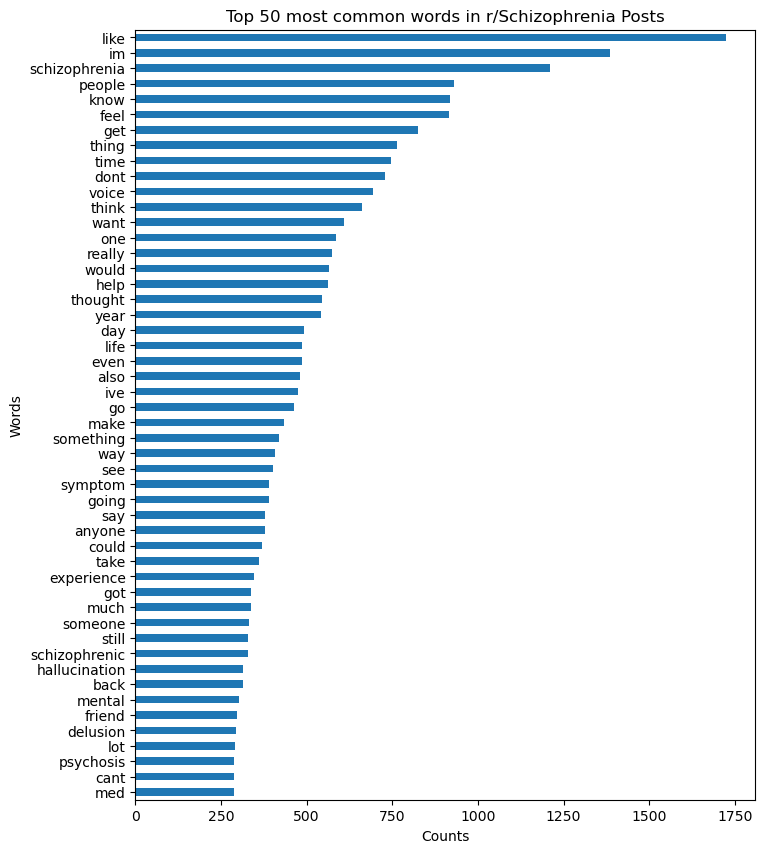

In [27]:
# preview the top 50 words with a bar chart

schizophrenia_df_cleaned_countvec_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common words in r/Schizophrenia Posts')
plt.show()

There are many irrelevant words like I, im etc., as well as words that do not appear often, and words that appear commonly in both schizophrenia and bipolar subreddits. We will identify and remove these words. 
Words like "schizophrenia" and "bipolar" have to be removed as they are directly related to the topics. 
There are also words that are unique to either the schizophrenia or bipolar subreddit, which we will preserve.

In short, the following will be done to form the feature list:
1. Create an exclusion list (irrelevant_words) for irrelevant words, words that do not appear often, and words that appear commonly in both subreddits
2. Create an inclusion list (relevant_words_schizo_bipolar) for words that need to stay
3. Add into the exclusion list the words that appear less than 3 times in each of the schizophrenia and bipolar subreddits. Words that appear less than 3 times in each subreddit but are in the inclusion list (relevant_words_schizo_bipolar) will not be added into the exclusion list.
4. Apply a function to remove the words in the datasets that are in the final exclusion list 

In [28]:
# Convert the schizophrenia countvec into a df
schi = schizophrenia_df_cleaned_countvec.sum().sort_values(ascending=False).to_frame().reset_index()
schi.columns = ['word','count']
# Convert the bipolar countvec into a df
bipo = bipolar_df_cleaned_countvec.sum().sort_values(ascending=False).to_frame().reset_index()
bipo.columns = ['word','count']

# Define a list of words that must stay
relevant_words_schizo_bipolar = ['viewed','voice','auditory','hallucination','channel','delusion','evil','belief','neighbor','visual','hearing','dopamine','olanzapine','youtube',
                         'psychosis','demon','link','video','male','loud','hear','brief','delusional','vision','paranoia','imagine','heard','strange','paranoid','police',
                         'spiritual','noise','character','psychotic','believed','individual','brother','topic','negative','reality','leg','real','dad','passed','door','god',
                         'memory','study','woman','sensation','white','wall','men','soul','view','connection','believe','information','head','name','walking','street',
                         'future','kill','touch','eye','father','research','symptom','cat','listen','movie','man','watch','recovery','power','specific','conversation',
                         'mentioned','scary','violent','red','laugh','joke','ability','apartment','speaking','word','alot','free','saw','true','room','opinion','learn','hypomania',
                         'hypomanic','lamictal','manic','mania','lithium','depressive','mixed','husband','swing','mood','depressed','proud',
                         'productive','shift','manage','spending','stable','seroquel','depression','episode','sex','drinking','insurance','appointment','job','emotionally',
                         'ptsd','boyfriend','adhd','ready','phase','adderall','miss','hit','slept','physically','plan','sleeping','schedule','sad','hobby','diagnosed','cycle','spent',
                         'date','medicated','public','latuda','bought','card','new','excited','fuck','yall','morning','team','week','antidepressant','hospitalized','bc',
                         'spend','mistake','breakdown','staying','reaction','work','prescribed','moved','incredibly','relationship','wife','lose','seriously','current','broke',
                         'terrible','amazing','summer','anger','therapy','therapist','healthy','struggling','psych','career','ton','personally','suicidal','med','pay','service',
                         'appreciated','coping']

# Define a list of words to be excluded
irrelevant_words = ['schizophrenia', 'bipolar','i', 'people', 'know', 'feel', 'im', 'get', 'like', 'thing', 'similar', 'really', 'want', 'get', 
                    'also', 'think', 'year', 'one', 'time', 'much', 'one', 'really', 'would', 'help', 'thought', 'year','day', 
                    'could', 'even', 'also', 'ive', 'go', 'make', 'something', 'way', 'see', 'going', 'say', 'anyone', 'could', 'take', 'got', 'much', 'someone', 'still', 
                    'back', 'lot', 'cant', 'need', 'month', 'since', 'never', 'good', 'even', 'anything', 'first', 'said', 'sometimes', 
                    'always', 'bad', 'around', 'well', 'tell', 'today', 'everything', 'better', 'told', 'trying', 'guy', 'right', 
                    'person', 'else', 'ever', 'last', 'come', 'night', 'ago', 'made', 'sure', 'everyone', 'away', 'getting', 'long', 'stop', 'keep', 'taking', 
                    'try', 'though', 'every', 'please', 'didnt', 'went', 'find', 'thinking', 'question', 'u','actually','thats','recently','may','two','maybe','some',
                    'feeling','friend','medication','mental','life','dont','experience','anxiety','diagnosis','family','doctor','xb', 'started','brain']

# irrelevant_words = ['schizophrenia', 'bipolar','xb','i','im','ive','u']

# Add words that appear very infrequently into the irrelevant_words list, except for words that are in the list of words that must stay
for ind in schi.index:
    if schi['count'][ind] <3:
        if schi['word'][ind] not in relevant_words_schizo_bipolar:
            irrelevant_words.append(schi['word'][ind])

print(f"{len(irrelevant_words)} words have been added into irrelevant_words in this first round.")

for ind in bipo.index:
    if bipo['count'][ind] <3:
        if bipo['word'][ind] not in relevant_words_schizo_bipolar:
            irrelevant_words.append(bipo['word'][ind])

print(f"{len(irrelevant_words)} words are in the final list of irrelevant_words.")

# Define the function to remove the words
def remove_irrwords(tokenized_list):
    text = [word for word in tokenized_list if word not in irrelevant_words]
    return text

# Remove the irrelevant_words from schizophrenia
schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] = schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem'].apply(remove_irrwords)

7431 words have been added into irrelevant_words in this first round.
14364 words are in the final list of irrelevant_words.


C:\Users\Jackson\AppData\Local\Temp\ipykernel_4284\1696056265.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] = schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem'].apply(remove_irrwords)


In [29]:
# vectorize for preview
schizophrenia_df_cleaned_countvec2 = make_count_vectorizer(schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'])

# preview the top 50 words in schizophrenia after removal of words
schizophrenia_df_cleaned_countvec2_top50 = schizophrenia_df_cleaned_countvec2.sum().sort_values(ascending=False).head(50)
schizophrenia_df_cleaned_countvec2_top50

voice            694
symptom          389
schizophrenic    329
hallucination    315
delusion         294
psychosis        287
med              287
believe          248
hear             242
work             239
diagnosed        237
mind             232
talk             230
real             225
head             219
week             188
talking          186
love             185
disorder         183
illness          179
sleep            173
psychotic        170
many             162
heard            159
without          159
post             158
kind             158
tried            157
might            156
god              156
hearing          156
effect           155
drug             155
episode          154
look             153
health           153
ill              152
hope             151
saying           148
word             148
point            147
little           147
stuff            147
hard             146
felt             145
able             144
give             144
normal       

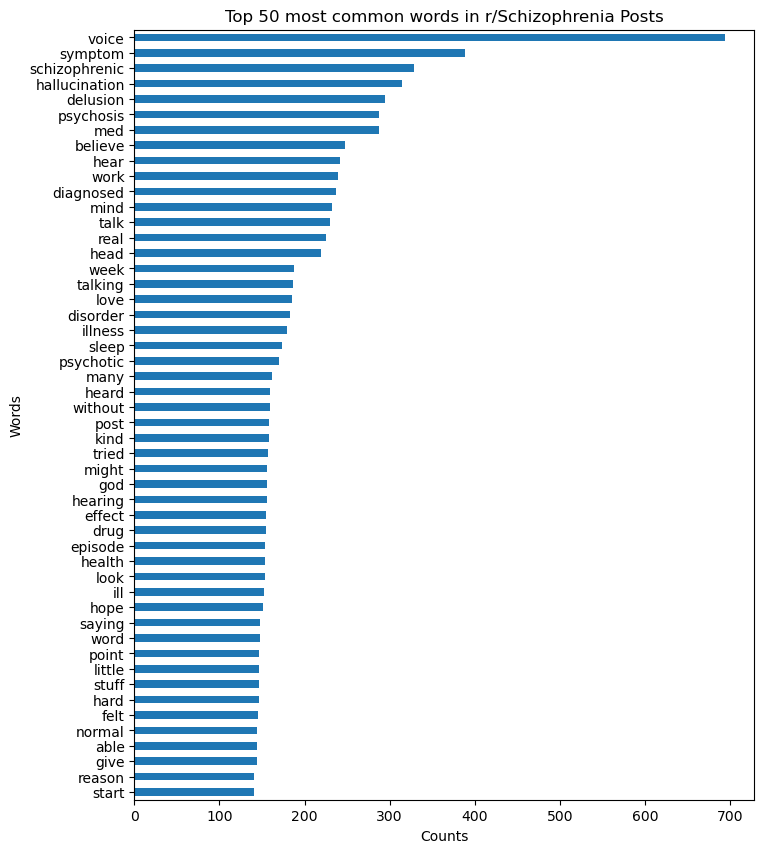

In [30]:
# preview the top 50 words with a bar chart after removal of words

schizophrenia_df_cleaned_countvec2_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common words in r/Schizophrenia Posts')
plt.show()

We can see that there are several words that are commonly occuring that are relevant to schizophrenia based on domain knowledge. These words include voice, hallucination, delusion, psychosis, psychotic etc.

### Zooming in on Bipolar

In [31]:
# preview the top 50 words in bipolar before removal of words
bipolar_df_cleaned_countvec_top50 = bipolar_df_cleaned_countvec.sum().sort_values(ascending=False).head(50)
bipolar_df_cleaned_countvec_top50

like          1862
im            1653
feel          1462
bipolar       1339
time          1080
get           1048
know          1015
year           790
day            789
want           783
really         780
thing          737
life           722
people         717
dont           715
one            677
think          632
even           628
would          619
med            604
episode        589
go             579
ive            574
going          557
work           553
make           537
help           501
manic          500
week           473
take           470
also           470
anyone         459
feeling        457
month          442
thought        427
got            427
much           426
something      421
medication     420
back           419
way            404
last           391
never          389
job            383
depression     381
need           376
good           374
still          374
friend         362
could          361
dtype: int64

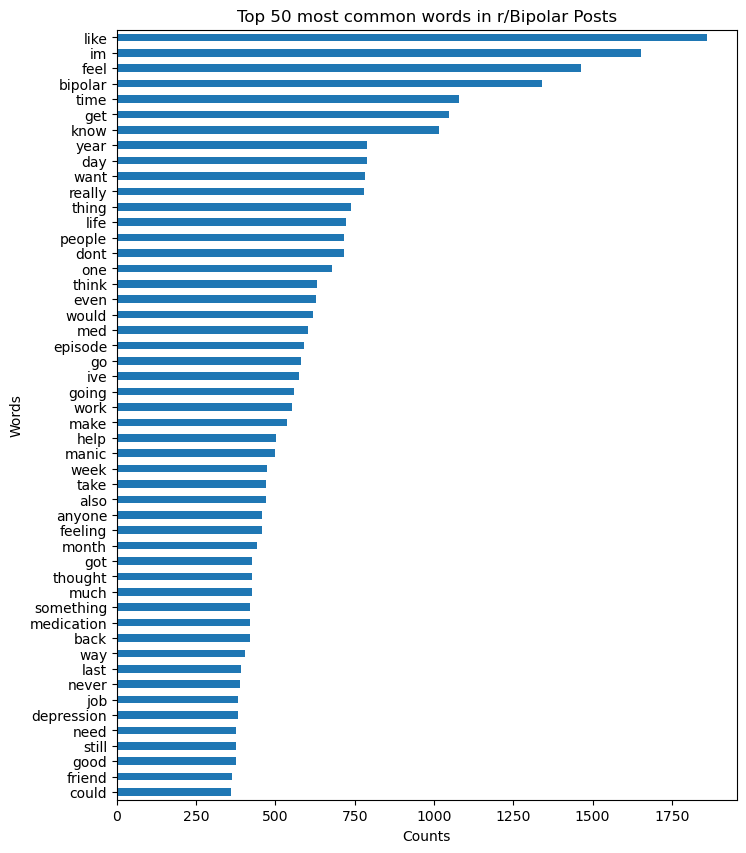

In [32]:
# preview the top 50 words with a bar chart

bipolar_df_cleaned_countvec_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common words in r/Bipolar Posts')
plt.show()

We will repeat the same steps of removing irrelevant and common words for bipolar

In [33]:
bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] = bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem'].apply(remove_irrwords)

C:\Users\Jackson\AppData\Local\Temp\ipykernel_4284\1182645699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] = bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem'].apply(remove_irrwords)


In [34]:
# vectorize for preview
bipolar_df_cleaned_countvec2 = make_count_vectorizer(bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'])

# preview the top 50 words in bipolar after removal of words
bipolar_df_cleaned_countvec2_top50 = bipolar_df_cleaned_countvec2.sum().sort_values(ascending=False).head(50)
bipolar_df_cleaned_countvec2_top50

med             604
episode         589
work            553
manic           500
week            473
job             383
depression      381
diagnosed       344
disorder        317
mood            299
mania           291
new             290
psychiatrist    262
felt            254
love            244
sleep           238
hard            234
past            229
depressed       224
many            224
nothing         209
point           209
symptom         207
health          202
relationship    201
start           200
without         199
normal          199
able            196
hour            193
talk            185
different       183
little          182
mind            181
post            179
mg              177
working         172
part            169
shit            166
change          166
home            166
done            165
pretty          165
end             163
therapist       161
fucking         161
wanted          160
best            160
advice          159
hate            158


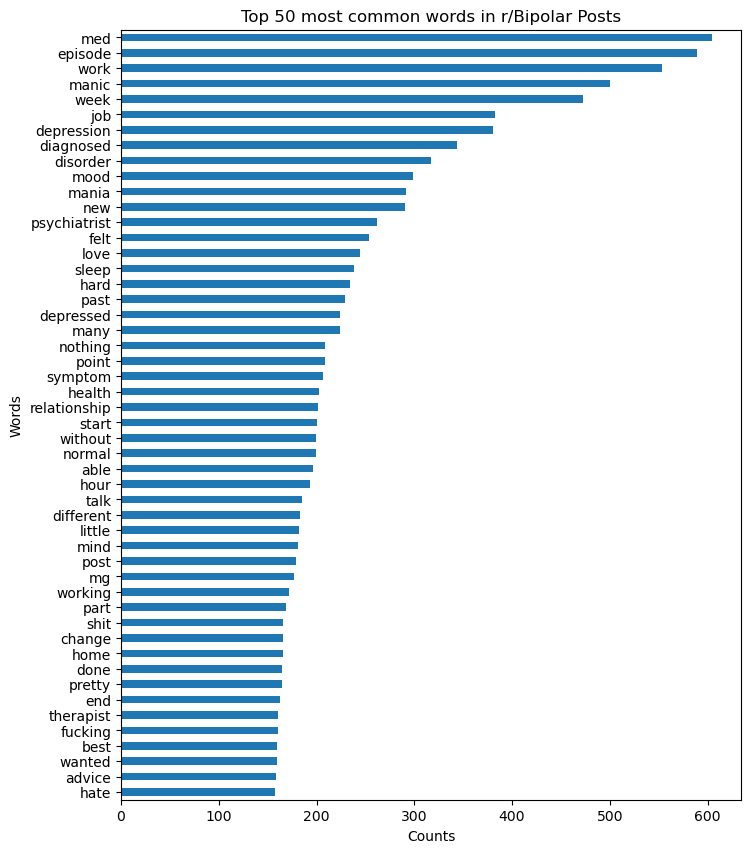

In [35]:
# preview the top 50 words with a bar chart after removal of words

bipolar_df_cleaned_countvec2_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common words in r/Bipolar Posts')
plt.show()

We can see that there are several words that are commonly occuring that are relevant to bipolar based on domain knowledge. These words include manic, depression, mania, mood etc.

Create Word Cloud for Schizophrenia

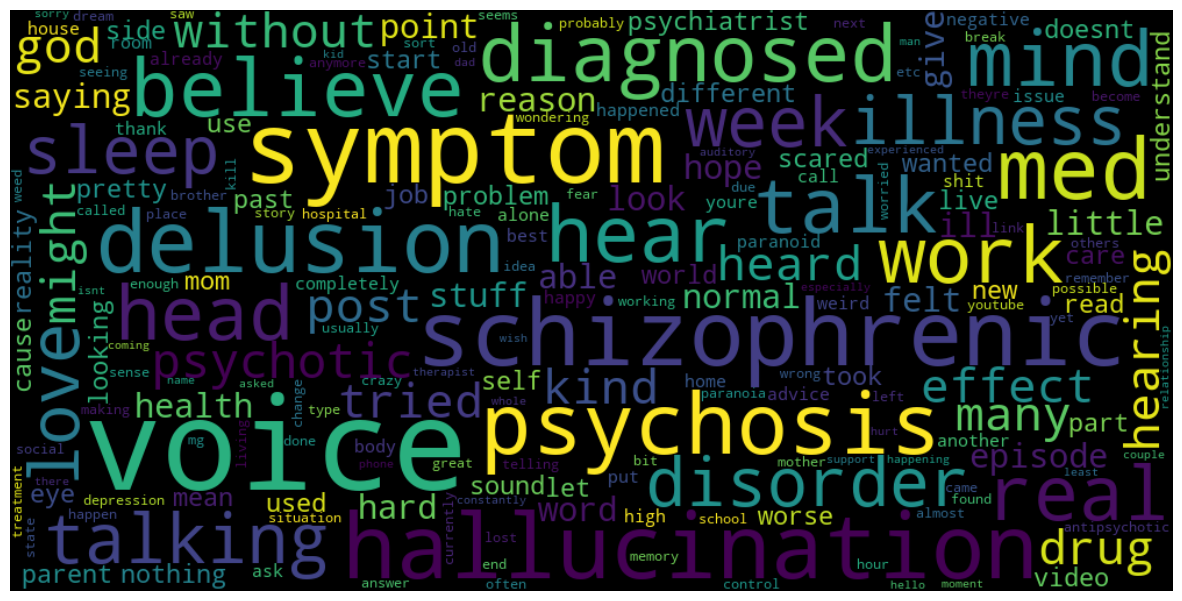

In [36]:
schizo_all_words = [word for tokens in schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] for word in tokens]
schizo_word_counts = Counter(schizo_all_words)
schizo_word_dict = dict(schizo_word_counts)
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate_from_frequencies(schizo_word_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Create Word Cloud for Bipolar

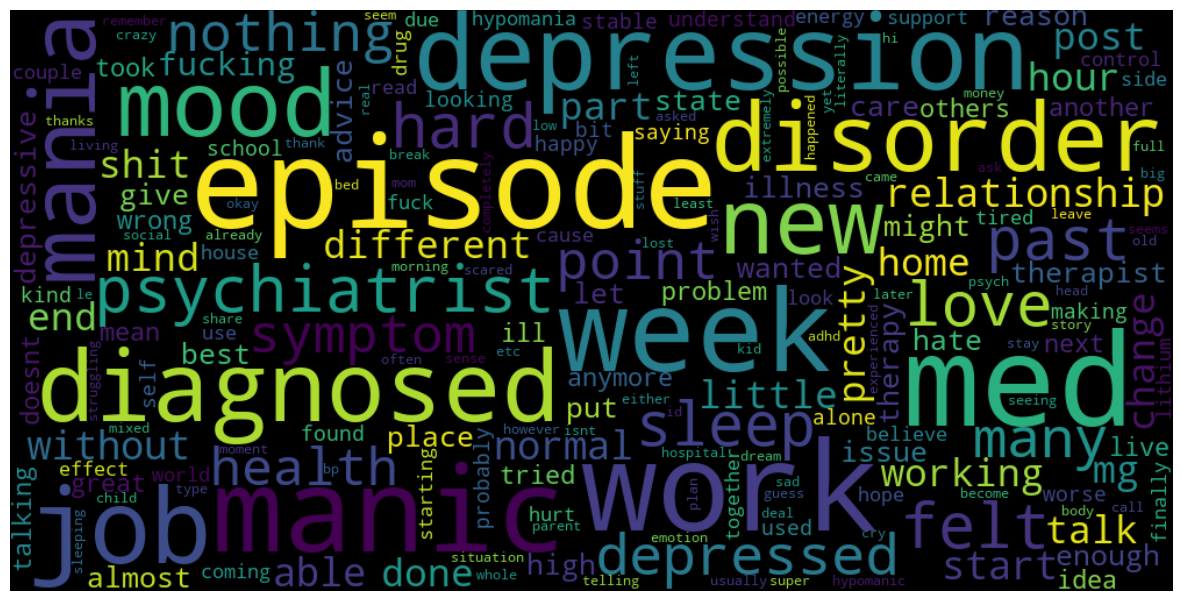

In [37]:
bipolar_all_words = [word for tokens in bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'] for word in tokens]
bipolar_word_counts = Counter(bipolar_all_words)
bipolar_word_dict = dict(bipolar_word_counts)
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate_from_frequencies(bipolar_word_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Next, we will go in depth to look at pairs and trios of words with Ngram Vectorizer to see if there are any potential insights.

In [38]:
# Define function for N-Gram lemmatization
def lemmatizing_ngram(tokenized_text):
    # return string of all lemmatized words for their corresponding words in tokenized_text
    text = " ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'] = schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'].apply(
    lambda x: lemmatizing_ngram(x))
bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'] = bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'].apply(
    lambda x: lemmatizing_ngram(x))


# Define the function for making Ngram
def make_ngram(df,num):
    ngram_vect = CountVectorizer(ngram_range=(num,num))
    X_counts_ngram = ngram_vect.fit_transform(df)
    X_counts_df_ngram= pd.DataFrame(X_counts_ngram.toarray())
    X_counts_df_ngram.columns = ngram_vect.get_feature_names_out()
    
    return X_counts_df_ngram

C:\Users\Jackson\AppData\Local\Temp\ipykernel_4284\4230140011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'] = schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'].apply(
C:\Users\Jackson\AppData\Local\Temp\ipykernel_4284\4230140011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'] = bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem2'].apply

Bigram for Schizophrenia

In [39]:
schizophrenia_df_cleaned_2ngram = make_ngram(schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'],2)
# preview the top 50 pairs of words in schizophrenia
schizophrenia_df_cleaned_2ngram_top50 = schizophrenia_df_cleaned_2ngram.sum().sort_values(ascending=False).head(50)
schizophrenia_df_cleaned_2ngram_top50

hearing voice                68
hear voice                   64
side effect                  64
auditory hallucination       52
voice head                   48
negative symptom             48
youtube channel              41
brief viewed                 38
youtube attached             38
attached video               38
link conquering              38
video brief                  38
video link                   38
conquering youtube           38
viewed amid                  35
mentally ill                 33
heard voice                  33
visual hallucination         32
schizoaffective disorder     30
panic attack                 28
hope youre                   25
youre happy                  25
psychotic break              25
psychotic episode            24
psych ward                   23
happy elizabethi             23
elizabethi hope              23
psychotic symptom            22
high school                  21
voice hear                   21
smoke weed                   19
psychoti

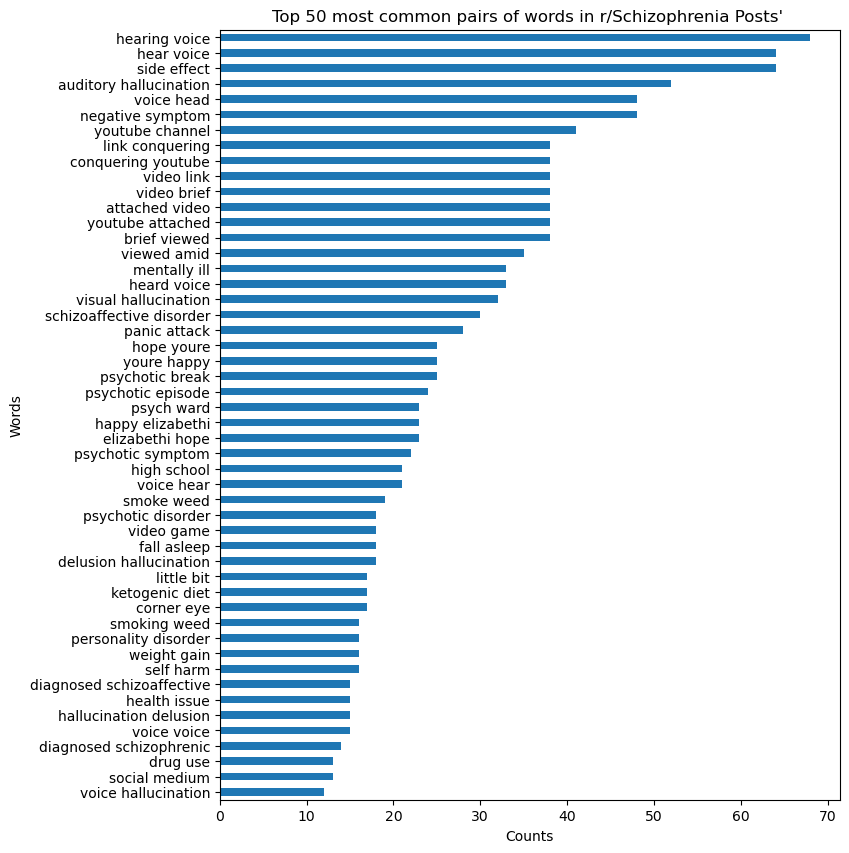

In [40]:
# preview the top 50 pairs of words with a bar chart

schizophrenia_df_cleaned_2ngram_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common pairs of words in r/Schizophrenia Posts\' ')
plt.show()

Pairs of words make sense as we see commonly associated pairs of words such as "hearing voice", "auditory hallucination" and similar words.

Trigram for Schizophrenia

In [41]:
schizophrenia_df_cleaned_3ngram = make_ngram(schizophrenia_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'],3)
# preview the top 50 trio of words in schizophrenia
schizophrenia_df_cleaned_3ngram_top50 = schizophrenia_df_cleaned_3ngram.sum().sort_values(ascending=False).head(50)
schizophrenia_df_cleaned_3ngram_top50

attached video link                   38
link conquering youtube               38
conquering youtube channel            38
youtube attached video                38
video brief viewed                    38
video link conquering                 38
brief viewed amid                     35
hope youre happy                      25
elizabethi hope youre                 23
youre happy elizabethi                23
happy elizabethi hope                 23
dependent masking effect              11
author et al                           9
youtube channel video                  8
channel video brief                    8
negative cognitive symptom             7
masking effect nia                     7
voice head telling                     6
save save save                         5
brief psychotic disorder               5
warmth wave energy                     5
voice hear voice                       5
positive negative symptom              5
play video game                        5
hearing voice se

Bigram for Bipolar

In [42]:
bipolar_df_cleaned_2ngram = make_ngram(bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'],2)
# preview the top 50 pairs of words in bipolar
bipolar_df_cleaned_2ngram_top50 = bipolar_df_cleaned_2ngram.sum().sort_values(ascending=False).head(50)
bipolar_df_cleaned_2ngram_top50

manic episode           147
depressive episode       98
side effect              58
mood swing               50
panic attack             49
mixed episode            43
psych ward               40
past week                32
mood stabilizer          28
couple week              28
new job                  24
high school              22
social medium            21
mentally ill             21
mood disorder            20
diagnosed bp             20
hold job                 20
weight gain              19
next week                19
mg lithium               19
wanted share             19
hypomanic episode        18
med change               18
full blown               18
little bit               18
mg mg                    18
new psychiatrist         16
support system           15
self harm                15
depression mania         14
credit card              14
self esteem              14
fall asleep              14
health issue             13
adhd med                 13
suicidal ideation   

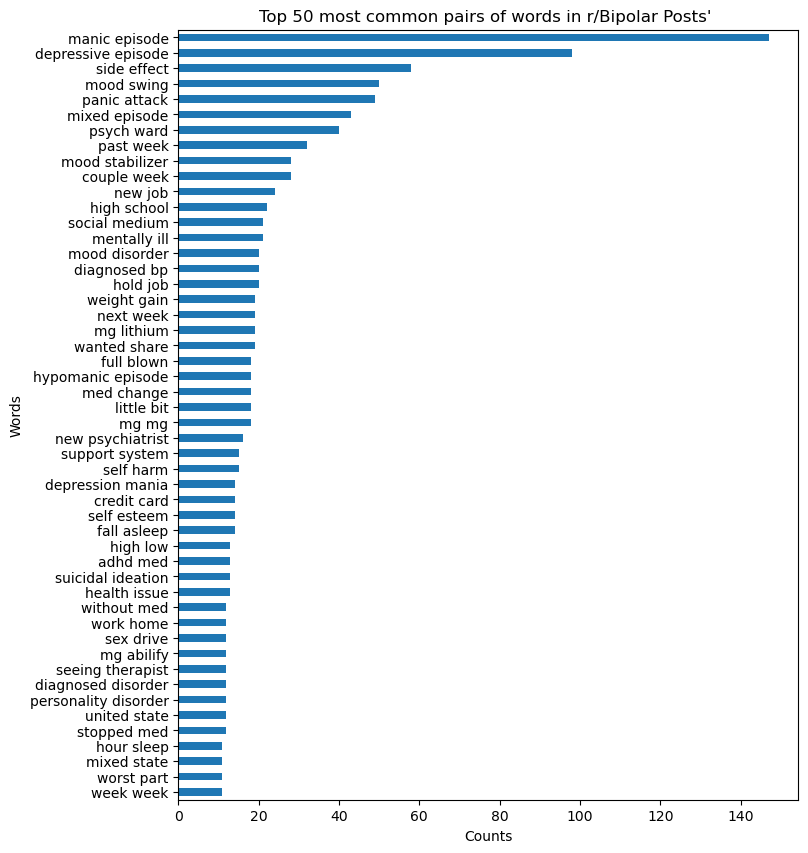

In [43]:
# preview the top 50 pairs of words with a bar chart

bipolar_df_cleaned_2ngram_top50.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 50 most common pairs of words in r/Bipolar Posts\' ')
plt.show()

Trigram for Bipolar

In [44]:
bipolar_df_cleaned_3ngram = make_ngram(bipolar_df_cleaned['combined_field_nopunct_tokens_nostop_lem3'],3)
# preview the top 50 trio of words in schizophrenia
bipolar_df_cleaned_3ngram_top50 = bipolar_df_cleaned_3ngram.sum().sort_values(ascending=False).head(50)
bipolar_df_cleaned_3ngram_top50

borderline personality disorder    10
full blown manic                    7
work hour week                      6
mg abilify mg                       6
mixed depressive episode            5
diagnosed manic episode             5
graduated high school               4
community health team               4
mania hypo mania                    4
playing video game                  4
call name running                   4
major depressive disorder           4
psychiatrist next week              4
severe depressive episode           4
possible side effect                4
manic mixed episode                 4
side effect med                     4
credit card debt                    4
jo quit running                     3
id love hear                        3
mood stabilizer new                 3
mg olanzapine mg                    3
able hold job                       3
mg mg mg                            3
panic attack work                   3
mood stabilizer adhd                3
fuck past fu

Bigrams appear to make more sense than trigrams for Schizophrenia and Bipolar posts.

## Modelling

Next, we will begin to create models and see their scores

- Count Vectorizer - Naive Bayes Bernouli
- Count Vectorizer - Naive Bayes Multinomial
- Count Vectorizer - Logistic Regression
- Count Vectorizer - Random Forest
- Count Vectorizer - Adaboost
- Count Vectorizer - Gradient Boosting
- TF-IDF - Naive Bayes Bernouli
- TF-IDF - Naive Bayes Multinomial
- TF-IDF - Logistic Regression
- TF-IDF Random Forest
- TF-IDF Adaboost
- TF-IDF Gradient Boosting

To create the models, we will do the following:
1. Define X and y
2. Create a train-test split of X and y
3. Call and fit the respective classification models
4. Generate scoring metrics to see how well the model is performing
5. Plot the Receiver Operating Characteristic (ROC) Curve to visualise the performance
6. Generate the confusion matrix dataframe to visualise the performance

Preparation work before modelling

In [45]:
# Merge the schizophrenia and bipolar dataframes back together

combined_df_cleaned3 = pd.concat([schizophrenia_df_cleaned, bipolar_df_cleaned])
combined_df_cleaned3

,id,title,text,score,comments_count,author,created_utc,gilding,combined_field,label,combined_field_nopunct_tokens_nostop_lem,combined_field_nopunct_tokens_nostop_lem2,combined_field_nopunct_tokens_nostop_lem3
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0,Frequently Asked Questions (Read This Sticky) ...,0,"[frequently, asked, question, read, sticky, we...","[frequently, asked, read, welcome, rule, read,...",frequently asked read welcome rule read follow...
1,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0,Some art I’ve done. Some art I’ve done in the ...,0,"[art, done, art, done, past, week]","[art, done, art, done, past, week]",art done art done past week
2,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0,Hospital/psych ward art Here’s two of my drawi...,0,"[hospitalpsych, ward, art, two, drawing, hospi...","[ward, art, drawing, hospital, funny, dark, th...",ward art drawing hospital funny dark theme psy...
3,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0,Fear that suicide is my destiny As a kid I wou...,0,"[fear, suicide, destiny, kid, would, get, sick...","[fear, suicide, kid, sick, gut, die, yr, old, ...",fear suicide kid sick gut die yr old seems end...
4,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0,If this disease is incurable and Kan will fore...,0,"[disease, incurable, kan, forever, like, think...","[disease, forever, continue, live, wont, elabo...",disease forever continue live wont elaborate r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,dbyed4,I did a thing!,"I threw out my ""just in case pills."" It was a ...",786,70,SassBHW,1.569958e+09,0,"I did a thing! I threw out my ""just in case pi...",1,"[thing, threw, case, pill, huge, bottle, lefto...","[threw, case, pill, huge, bottle, pill, couldn...",threw case pill huge bottle pill couldnt bring...
3238,k4gor5,(hypo)mania and depression aren't just intense...,I started Lamictal a couple months ago and thi...,768,71,fighterpilot909,1.606810e+09,0,(hypo)mania and depression aren't just intense...,1,"[hypomania, depression, arent, intense, versio...","[hypomania, depression, arent, intense, versio...",hypomania depression arent intense version hap...
3239,ig43dn,i fucking got in to grad school guys,i was cycling really hard my entire undergradu...,771,54,somethingsophie,1.598325e+09,0,i fucking got in to grad school guys i was cyc...,1,"[fucking, got, grad, school, guy, cycling, rea...","[fucking, grad, school, hard, entire, career, ...",fucking grad school hard entire career gpa uni...
3240,lb1ouw,My semester GPA is 4.00!,My hands are shaking and I am in complete disb...,762,73,BipolarMindAtNotEase,1.612288e+09,0,My semester GPA is 4.00! My hands are shaking ...,1,"[semester, gpa, hand, shaking, complete, disbe...","[semester, gpa, hand, shaking, complete, diagn...",semester gpa hand shaking complete diagnosed a...


Rows are back to 3242 as in combined_df

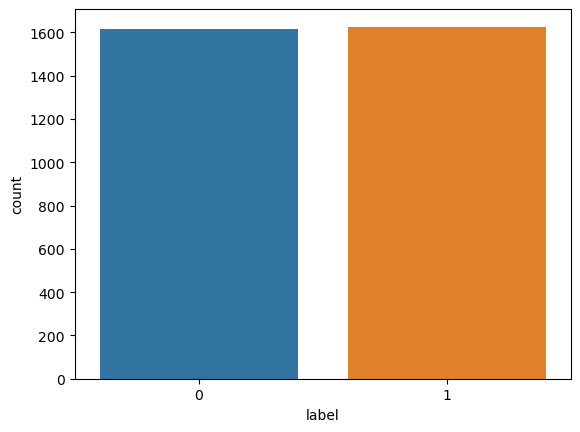

In [46]:
# Check that there are only 2 classes of values for target variable ('0' for schizophrenia and '1' for bipolar)
label_categories = sns.countplot(x='label', data=combined_df_cleaned3);

#### Define X and y

In [47]:
X = combined_df_cleaned3['combined_field_nopunct_tokens_nostop_lem3']
y = combined_df_cleaned3['label']

#### Create Train-Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    random_state = 69)

- Count Vectorizer - Naive Bayes Bernouli

In [49]:
cvec = CountVectorizer()
X_train =  cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)

# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
cv_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
cv_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Count Vectorizer - Naive Bayes Bernouli model:")
print(f"Count Vectorizer - Naive Bayes Bernouli Train Score: {round(cv_nb_bernouli_train_score,4)}")
print(f"Count Vectorizer - Naive Bayes Bernouli Test Score: {round(cv_nb_bernouli_test_score,4)}")
print(" ")
# Display Classification Metrics
print("Count Vectorizer - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Count Vectorizer - Naive Bayes Bernouli model:
Count Vectorizer - Naive Bayes Bernouli Train Score: 0.87
Count Vectorizer - Naive Bayes Bernouli Test Score: 0.8101
 
Count Vectorizer - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       404
           1       0.86      0.74      0.80       407

    accuracy                           0.81       811
   macro avg       0.82      0.81      0.81       811
weighted avg       0.82      0.81      0.81       811



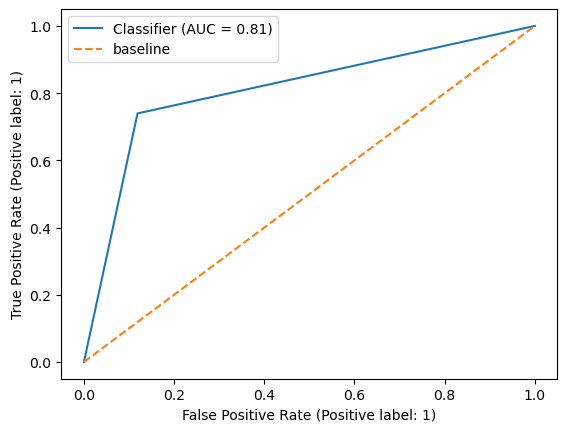

In [50]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [51]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,356,48
actual bipolar,106,301


Feature Importance

In [52]:
df_cv_BernNB_coef = pd.DataFrame(np.exp(BernNB.feature_log_prob_) , columns = cvec.get_feature_names_out()).T

Ranking of Coefficients by Importance for Schizophrenia Prediction

In [53]:
df_cv_BernNB_coef.sort_values(by=0, ascending=False).head(25)

,0,1
voice,0.177924,0.018018
symptom,0.154036,0.101556
schizophrenic,0.138386,0.002457
diagnosed,0.126853,0.166257
hallucination,0.123558,0.013104
med,0.121911,0.212121
talk,0.115321,0.083538
delusion,0.114498,0.019656
psychosis,0.109555,0.028665
hear,0.107908,0.037674


Ranking of Coefficients by Importance for Bipolar Prediction

In [54]:
df_cv_BernNB_coef.sort_values(by=1, ascending=False).head(25)

,0,1
episode,0.076606,0.217035
med,0.121911,0.212121
week,0.089786,0.199017
manic,0.008237,0.197379
work,0.103789,0.195741
diagnosed,0.126853,0.166257
depression,0.053542,0.150696
disorder,0.086491,0.132678
new,0.065898,0.124488
mania,0.008237,0.122850


- Count Vectorizer - Naive Bayes Multinomial

In [55]:
# Training the Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Saving the train and test scores
cv_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
cv_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Count Vectorizer - Naive Bayes Multinomial model:")
print(f"Count Vectorizer - Naive Bayes Multinomial Train Score: {round(cv_nb_multinomial_train_score,4)}")
print(f"Count Vectorizer - Naive Bayes Multinomial Test Score: {round(cv_nb_multinomial_test_score,4)}")
print(" ")
# Display Classification Metrics
print("Count Vectorizer - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Count Vectorizer - Naive Bayes Multinomial model:
Count Vectorizer - Naive Bayes Multinomial Train Score: 0.8881
Count Vectorizer - Naive Bayes Multinomial Test Score: 0.7904
 
Count Vectorizer - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       404
           1       0.78      0.82      0.80       407

    accuracy                           0.79       811
   macro avg       0.79      0.79      0.79       811
weighted avg       0.79      0.79      0.79       811



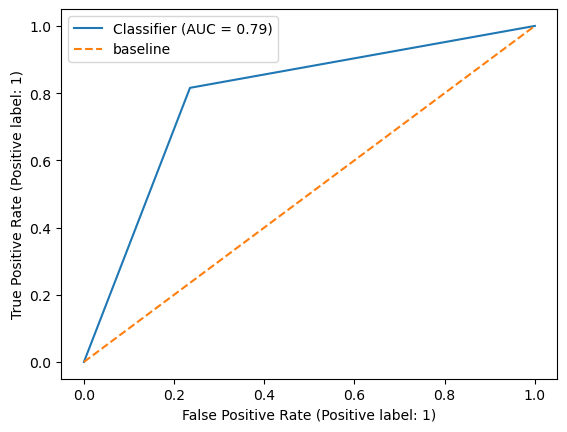

In [56]:
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [57]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,309,95
actual bipolar,75,332


- Count Vectorizer - Logistic Regression

In [58]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
cv_logreg_train_score = accuracy_score(y_train, y_pred_train)
cv_logreg_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Count Vectorizer - Logistic Regression model:")
print(f"Count Vectorizer - Logistic Regression Train Score: {round(cv_logreg_train_score,4)}")
print(f"Count Vectorizer - Logistic Regression Test Score: {round(cv_logreg_test_score,4)}")
print(" ")
# Display Classification Metrics
print("Count Vectorizer - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Count Vectorizer - Logistic Regression model:
Count Vectorizer - Logistic Regression Train Score: 0.9914
Count Vectorizer - Logistic Regression Test Score: 0.7855
 
Count Vectorizer - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       404
           1       0.81      0.75      0.78       407

    accuracy                           0.79       811
   macro avg       0.79      0.79      0.79       811
weighted avg       0.79      0.79      0.79       811



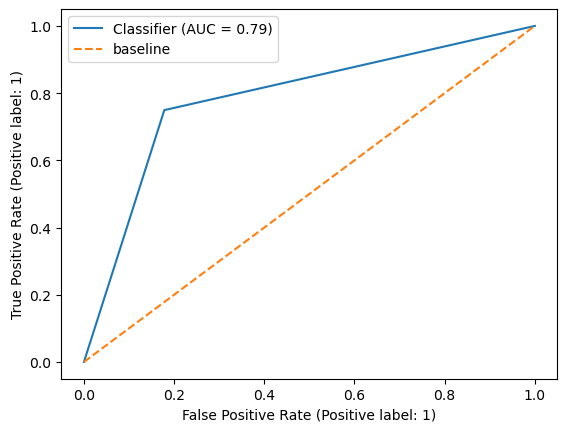

In [59]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [60]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,332,72
actual bipolar,102,305


In [61]:
df_cv_logreg_coef = pd.DataFrame(np.exp(LogReg.coef_) , columns = cvec.get_feature_names_out()).T

Ranking of Coefficients by Importance for Bipolar Prediction

In [62]:
df_cv_logreg_coef.reset_index(drop=False, inplace = True)
df_cv_logreg_coef.columns = ["features", "coef"]
df_cv_logreg_coef.sort_values(by="coef", ascending=False).head(20)

,features,coef
2088,manic,11.059927
2086,mania,6.457115
2003,lithium,5.773341
428,bp,5.613561
1926,lamotrigine,4.231256
2228,mood,4.216222
1683,hypomania,3.689658
1925,lamictal,3.587350
3051,sense,3.286402
878,depressive,3.061122


Ranking of Coefficients by Importance for Schizophrenia Prediction

In [63]:
df_cv_logreg_coef[df_cv_logreg_coef["coef"]<1].sort_values(by="coef", ascending=True).head(20)

,features,coef
3001,schizophrenic,0.055051
3753,voice,0.126606
1538,hallucination,0.138677
2998,schizoaffective,0.143577
2692,psychosis,0.244069
3380,sunday,0.291371
857,delusion,0.300098
451,btw,0.315245
3411,switching,0.325488
3746,visit,0.364223


- Random Forest Count Vectorizer

In [64]:
classifier = RandomForestClassifier(n_estimators=700, random_state=69)
classifier.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# Saving the train and test scores
randomforest_train_score = accuracy_score(y_train, y_pred_train)
randomforest_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Random Forest model:")
print(f"Random Forest Train Score: {round(randomforest_train_score,4)}")
print(f"Random Forest  Test Score: {round(randomforest_test_score,4)}")
print(" ")
# Display Classification Metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Random Forest model:
Random Forest Train Score: 0.9992
Random Forest  Test Score: 0.8372
 
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       404
           1       0.83      0.85      0.84       407

    accuracy                           0.84       811
   macro avg       0.84      0.84      0.84       811
weighted avg       0.84      0.84      0.84       811



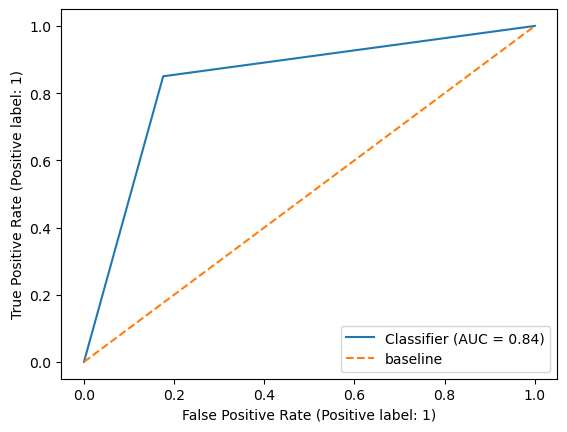

In [65]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [66]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,333,71
actual bipolar,61,346


In [67]:
# # GridsearchCV to find the optimal hyperparameter
# params = {"n_estimators":[100,300,500,700,1000, 1200]}  ## provide the grid in the form of a dictionary
# model = GridSearchCV(classifier, params, cv=5)

In [68]:
# model.fit(X_train, y_train)
# model.best_params_

- Adaboost Count Vectorizer

In [69]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.9)
clf.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Saving the train and test scores
adaboost_train_score = accuracy_score(y_train, y_pred_train)
adaboost_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Adaptive Boosting model:")
print(f"Adaptive Boosting Train Score: {round(adaboost_train_score,4)}")
print(f"Adaptive Boosting Test Score: {round(adaboost_test_score,4)}")
print(" ")
# Display Classification Metrics
print("Adaptive Boosting Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Adaptive Boosting model:
Adaptive Boosting Train Score: 0.8548
Adaptive Boosting Test Score: 0.7707
 
Adaptive Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       404
           1       0.80      0.72      0.76       407

    accuracy                           0.77       811
   macro avg       0.77      0.77      0.77       811
weighted avg       0.77      0.77      0.77       811



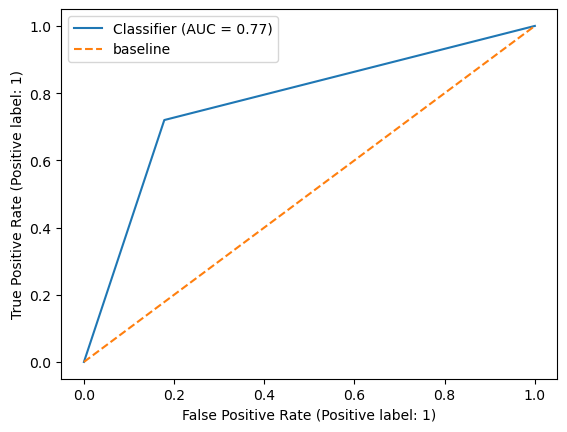

In [70]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [71]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,332,72
actual bipolar,114,293


In [72]:
# # GridSearchCV to find the optimal hyperparameter

# ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# ada_params = {
#     'n_estimators': [50,100],
#     'base_estimator__max_depth': [1,2],
#     'learning_rate': [.9, 1.]
# }
# gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

- Gradient Boost Count Vectorizer

In [73]:
clf_gradientboost = GradientBoostingClassifier(n_estimators=125, max_depth=4,learning_rate=0.12)
clf_gradientboost.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = clf_gradientboost.predict(X_train)
y_pred_test = clf_gradientboost.predict(X_test)

# Saving the train and test scores
gradientboost_train_score = accuracy_score(y_train, y_pred_train)
gradientboost_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Gradient Boosting model:")
print(f"Gradient Boosting Train Score: {round(gradientboost_train_score,4)}")
print(f"Gradient Boosting Test Score: {round(gradientboost_test_score,4)}")
print(' ')
# Display Classification Metrics
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Gradient Boosting model:
Gradient Boosting Train Score: 0.9223
Gradient Boosting Test Score: 0.8052
 
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       404
           1       0.83      0.78      0.80       407

    accuracy                           0.81       811
   macro avg       0.81      0.81      0.81       811
weighted avg       0.81      0.81      0.81       811



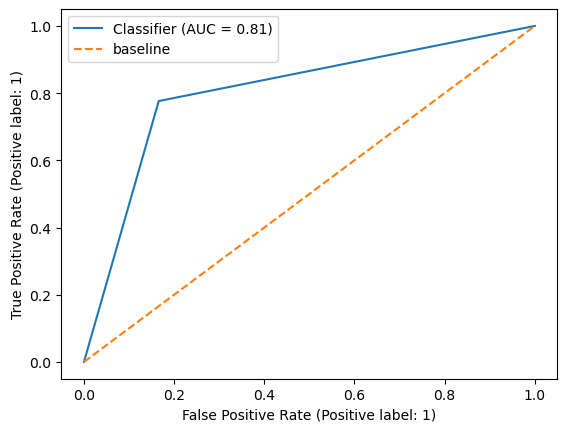

In [74]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [75]:
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,337,67
actual bipolar,91,316


In [76]:
# # GridSearchCV to find the optimal hyperparameter

# gboost = GradientBoostingClassifier()
# gboost_params = {
#     'max_depth': [2,3,4],
#     'n_estimators': [100, 125, 150],
#     'learning_rate': [.08, .1, .12]
# }
# gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
# gb_gs.fit(X_train, y_train)
# print(gb_gs.best_score_)
# gb_gs.best_params_

Preparing the dataset for TF-IDF

Define X and y

In [77]:
X = combined_df_cleaned3['combined_field_nopunct_tokens_nostop_lem3']
y = combined_df_cleaned3['label']

Create Train-Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    random_state = 69)

In [79]:
tfidf_vect = TfidfVectorizer()
X_train =  tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

- TF-IDF Naive Bayes Bernouli

In [80]:
# Training the Bernoulli Model
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = BernNB.predict(X_train)
y_pred_test = BernNB.predict(X_test)

# Saving the train and test scores
tfidf_nb_bernouli_train_score = accuracy_score(y_train, y_pred_train)
tfidf_nb_bernouli_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the TFIDF - Naive Bayes Bernouli model:")
print(f"TFIDF - Naive Bayes Bernouli Train Score: {round(tfidf_nb_bernouli_train_score,4)}")
print(f"TFIDF - Naive Bayes Bernouli Test Score: {round(tfidf_nb_bernouli_test_score,4)}")
print(' ')
# Display Classification Metrics
print("TFIDF - Naive Bayes Bernouli Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the TFIDF - Naive Bayes Bernouli model:
TFIDF - Naive Bayes Bernouli Train Score: 0.8939
TFIDF - Naive Bayes Bernouli Test Score: 0.7916
 
TFIDF - Naive Bayes Bernouli Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       404
           1       0.83      0.73      0.78       407

    accuracy                           0.79       811
   macro avg       0.80      0.79      0.79       811
weighted avg       0.80      0.79      0.79       811



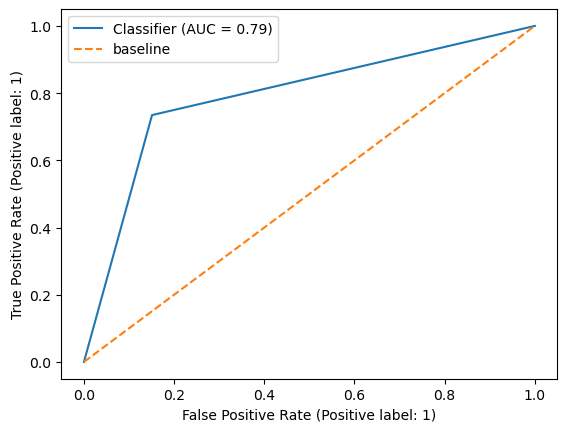

In [81]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [82]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,343,61
actual bipolar,108,299


- TFIDF Naive Bayes Multinomial

In [83]:
# Training the Multinomial Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Saving the train and test scores
tfidf_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
tfidf_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the 2Ngram - Naive Bayes Multinomial model:")
print(f"TFIDF - Naive Bayes Multinomial Train Score: {round(tfidf_nb_multinomial_train_score,4)}")
print(f"TFIDF - Naive Bayes Multinomial Test Score: {round(tfidf_nb_multinomial_test_score,4)}")
print(' ')
# Display Classification Metrics
print("TFIDF - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the 2Ngram - Naive Bayes Multinomial model:
TFIDF - Naive Bayes Multinomial Train Score: 0.9029
TFIDF - Naive Bayes Multinomial Test Score: 0.7916
 
TFIDF - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       404
           1       0.77      0.84      0.80       407

    accuracy                           0.79       811
   macro avg       0.79      0.79      0.79       811
weighted avg       0.79      0.79      0.79       811



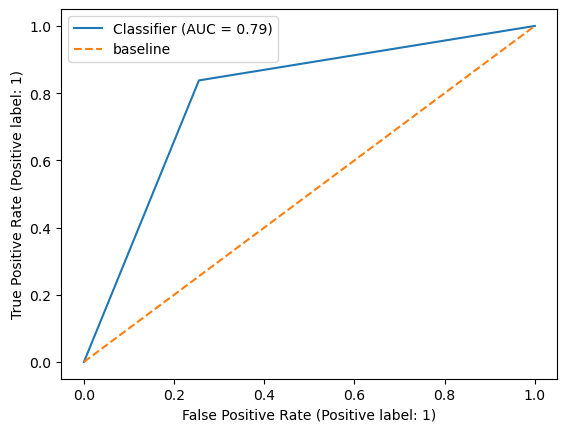

In [84]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [85]:
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,301,103
actual bipolar,66,341


- TFIDF Logistic Regression

In [86]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
tfidf_logreg_train_score = accuracy_score(y_train, y_pred_train)
tfidf_logreg_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Count Vectorizer - Logistic Regression model:")
print(f"TFIDF- Logistic Regression Train Score: {round(tfidf_logreg_train_score,4)}")
print(f"TFIDF - Logistic Regression Test Score: {round(tfidf_logreg_test_score,4)}")
print(' ')
# Display Classification Metrics
print("TFIDF - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Count Vectorizer - Logistic Regression model:
TFIDF- Logistic Regression Train Score: 0.9264
TFIDF - Logistic Regression Test Score: 0.8015
 
TFIDF - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       404
           1       0.82      0.78      0.80       407

    accuracy                           0.80       811
   macro avg       0.80      0.80      0.80       811
weighted avg       0.80      0.80      0.80       811



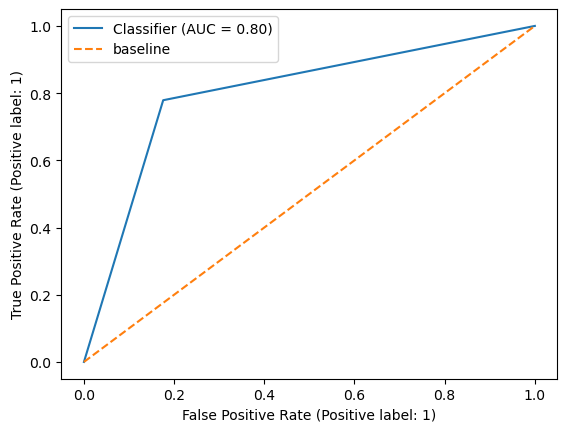

In [87]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [88]:
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,333,71
actual bipolar,90,317


- Random Forest TFIDF

In [89]:
classifier = RandomForestClassifier(n_estimators=100, random_state=69)
classifier.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# Saving the train and test scores
randomforest_tfidf_train_score = accuracy_score(y_train, y_pred_train)
randomforest_tfidf_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Random Forest TFIDF model:")
print(f"Random Forest TFIDF Train Score: {round(randomforest_tfidf_train_score,4)}")
print(f"Random Forest TFIDF Test Score: {round(randomforest_tfidf_test_score,4)}")
print(' ')
# Display Classification Metrics
print("Random Forest TFIDF Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Random Forest TFIDF model:
Random Forest TFIDF Train Score: 0.9992
Random Forest TFIDF Test Score: 0.8212
 
Random Forest TFIDF Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       404
           1       0.82      0.83      0.82       407

    accuracy                           0.82       811
   macro avg       0.82      0.82      0.82       811
weighted avg       0.82      0.82      0.82       811



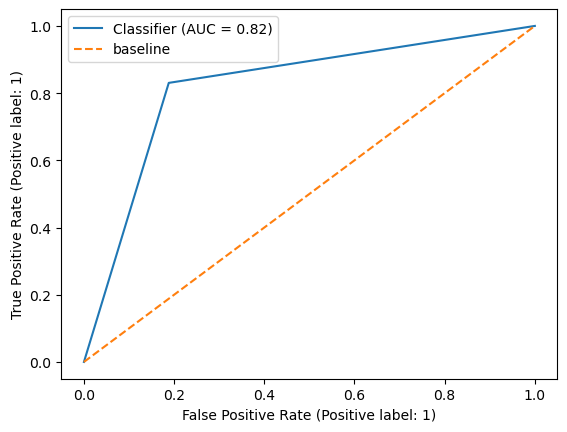

In [90]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [91]:
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,328,76
actual bipolar,69,338


In [92]:
#GridSearchCV to find the optimal hyperparameter

# params = {"n_estimators":[100,300,500,700,1000]}  ## provide the grid in the form of a dictionary
# model = GridSearchCV(classifier, params, cv=5)

In [93]:
# model.fit(X_train, y_train)
# model.best_params_

- Adaboost TFIDF

In [94]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.9)
clf.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Saving the train and test scores
adaboost_tfidf_train_score = accuracy_score(y_train, y_pred_train)
adaboost_tfidf_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Adaptive Boosting TFIDF model:")
print(f"Adaptive Boosting TFIDF Train Score: {round(adaboost_tfidf_train_score,4)}")
print(f"Adaptive Boosting TFIDF Test Score: {round(adaboost_tfidf_test_score,4)}")
print(' ')
# Display Classification Metrics
print("Adaboost TFIDF Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Adaptive Boosting TFIDF model:
Adaptive Boosting TFIDF Train Score: 0.8248
Adaptive Boosting TFIDF Test Score: 0.7867
 
Adaboost TFIDF Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       404
           1       0.82      0.74      0.78       407

    accuracy                           0.79       811
   macro avg       0.79      0.79      0.79       811
weighted avg       0.79      0.79      0.79       811



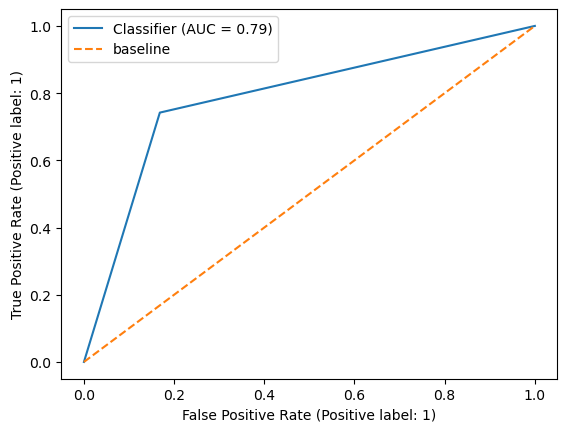

In [95]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [96]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,336,68
actual bipolar,105,302


In [97]:
# # GridSearchCV to find the optimal hyperparameter

# ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# ada_params = {
#     'n_estimators': [50,100],
#     'base_estimator__max_depth': [1,2],
#     'learning_rate': [.9, 1.]
# }
# gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

- Gradient Boost TFIDF

In [98]:
clf_gradientboost = GradientBoostingClassifier(n_estimators=150, max_depth=2,learning_rate=0.12)
clf_gradientboost.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = clf_gradientboost.predict(X_train)
y_pred_test = clf_gradientboost.predict(X_test)

# Saving the train and test scores
gradientboost_tfidf_train_score = accuracy_score(y_train, y_pred_train)
gradientboost_tfidf_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the Gradient Boosting model:")
print(f"Gradient Boosting TFIDF Train Score: {round(gradientboost_tfidf_train_score,4)}")
print(f"Gradient Boosting TFIDF Test Score: {round(gradientboost_tfidf_test_score,4)}")
print(' ')
# Display Classification Metrics
print("Gradient Boosting TFIDF Classification Report:")
print(classification_report(y_test, y_pred_test))

Accuracy Scores for the Gradient Boosting model:
Gradient Boosting TFIDF Train Score: 0.8832
Gradient Boosting TFIDF Test Score: 0.7904
 
Gradient Boosting TFIDF Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       404
           1       0.81      0.75      0.78       407

    accuracy                           0.79       811
   macro avg       0.79      0.79      0.79       811
weighted avg       0.79      0.79      0.79       811



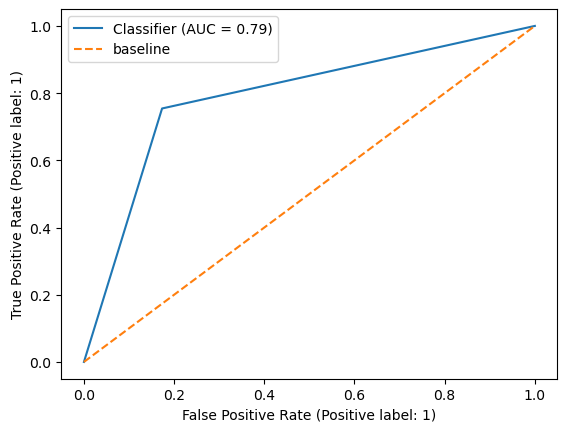

In [99]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [100]:
# create a confusion matrix using the confusion_matrix function from sklearn's metrics module
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm, columns=['pred schizophrenia', 'pred bipolar'], index=['actual schizophrenia', 'actual bipolar'])
cm_df

,pred schizophrenia,pred bipolar
actual schizophrenia,334,70
actual bipolar,100,307


In [101]:
# # GridSearchCV to find the optimal hyperparameter

# gboost = GradientBoostingClassifier()
# gboost_params = {
#     'max_depth': [2,3,4],
#     'n_estimators': [100, 125, 150],
#     'learning_rate': [.08, .1, .12]
# }
# gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
# gb_gs.fit(X_train, y_train)
# print(gb_gs.best_score_)
# gb_gs.best_params_

## Model Result Summary

|Count Vectorization Method|Model|Train Scores|Test scores
|:--|:--|:-:|:-:|
|**<font color = pink>Count Vectorizer</font>**|**<font color = pink>Naive Bayes Bernouli</font>**|**<font color = pink>0.87</font>**|**<font color = pink>0.8101</font>**|
|Count Vectorizer|Naive Bayes Multinomial|0.8881|0.7904|
|Count Vectorizer|Logistic Regression|0.9914|0.7855|
|Count Vectorizer|Random Forest|0.9992|0.8372|
|Count Vectorizer|Adaptive Boosting|0.8548|0.7707|
|Count Vectorizer|Gradient Boosting|0.9227|0.8163|
|TF-IDF|Naive Bayes Bernouli|0.8939|0.7916|
|TF-IDF|Naive Bayes Multinomial|0.9029|0.7916|
|TF-IDF|Logistic Regression|0.9264|0.8015|
|TF-IDF|Random Forest|0.9992|0.8212|
|TF-IDF|Adaptive Boosting|0.8248|0.7867|
|TF-IDF|Gradient Boosting|0.8836|0.7953|

The models did generally well with decent test scores. However, many of the models are overfitting as the difference between their respective train and test scores is more than 0.1.

As such, the best performing model that did not overfit is the Count Vectorizer Naive Bayes Bernouli model.

The top 25 features that predict for schizophrenia are below ('0' correspond to the schizophrenia category):

In [102]:
df_cv_BernNB_coef.sort_values(by=0, ascending=False).head(25)

,0,1
voice,0.177924,0.018018
symptom,0.154036,0.101556
schizophrenic,0.138386,0.002457
diagnosed,0.126853,0.166257
hallucination,0.123558,0.013104
med,0.121911,0.212121
talk,0.115321,0.083538
delusion,0.114498,0.019656
psychosis,0.109555,0.028665
hear,0.107908,0.037674


The top 25 features that predict for bipolar are below ('1' correspond to the bipolar category):

In [103]:
df_cv_BernNB_coef.sort_values(by=1, ascending=False).head(25)

,0,1
episode,0.076606,0.217035
med,0.121911,0.212121
week,0.089786,0.199017
manic,0.008237,0.197379
work,0.103789,0.195741
diagnosed,0.126853,0.166257
depression,0.053542,0.150696
disorder,0.086491,0.132678
new,0.065898,0.124488
mania,0.008237,0.122850


## Streamlit code for demo

In [104]:
import pickle

with open('Model.pkl', 'wb') as file:
    pickle.dump(BernNB, file)

In [105]:
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(cvec, file)

## Conclusion